In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Credits: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

### Objectives
-  What was the change in price of the stock over time?
-  What was the daily return of the stock on average?
-  What was the moving average of the various stocks?
-  What was the correlation between different stocks'?
-  How much value do we put at risk by investing in a particular stock?
-  How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-08-20,213.350006,210.320007,210.880005,210.360001,26884300.0,208.293350,APPLE
2019-08-21,213.649994,211.600006,212.990005,212.639999,21535400.0,210.550949,APPLE
2019-08-22,214.440002,210.750000,213.190002,212.460007,22253700.0,210.372726,APPLE
2019-08-23,212.050003,201.000000,209.429993,202.639999,46818000.0,200.649200,APPLE
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.461349,APPLE


In [22]:
start

datetime.datetime(2019, 8, 20, 0, 0)

In [6]:
df.isna().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1012 entries, 2019-08-20 to 2020-08-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          1012 non-null   float64
 1   Low           1012 non-null   float64
 2   Open          1012 non-null   float64
 3   Close         1012 non-null   float64
 4   Volume        1012 non-null   float64
 5   Adj Close     1012 non-null   float64
 6   company_name  1012 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.2+ KB


In [8]:
df['company_name'].unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,298.528498,291.461384,294.619565,295.394703,3.614473e+07,293.946075
std,61.105675,59.635137,60.305755,60.539081,1.722764e+07,61.037661
min,205.720001,201.000000,204.100006,202.639999,1.165440e+07,200.649200
25%,257.489990,246.720001,249.539993,249.050003,2.464300e+07,247.114319
50%,288.250000,281.230011,284.690002,287.049988,3.141070e+07,285.759827
75%,324.239990,318.750000,322.369995,321.850006,4.169890e+07,321.270752
max,468.649994,462.440002,464.250000,462.829987,1.067212e+08,462.829987


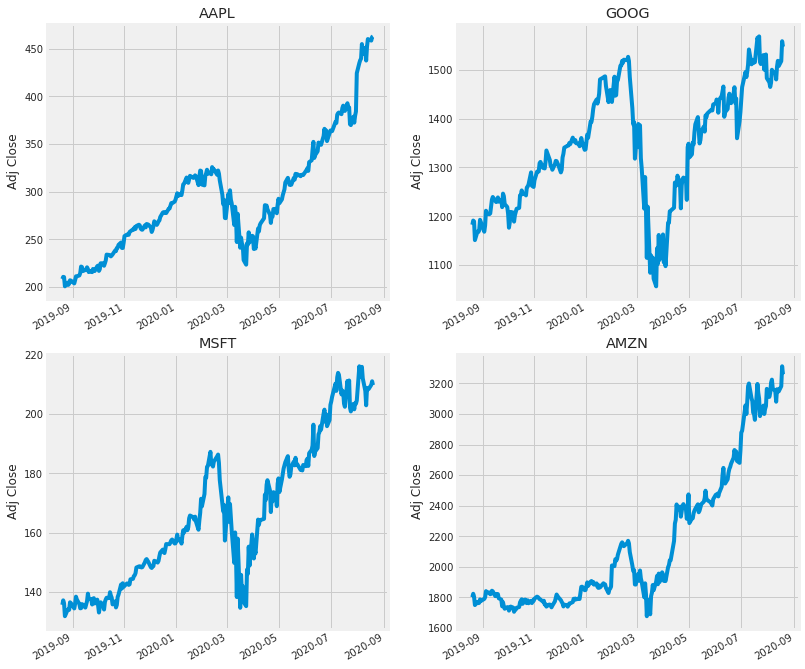

In [10]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

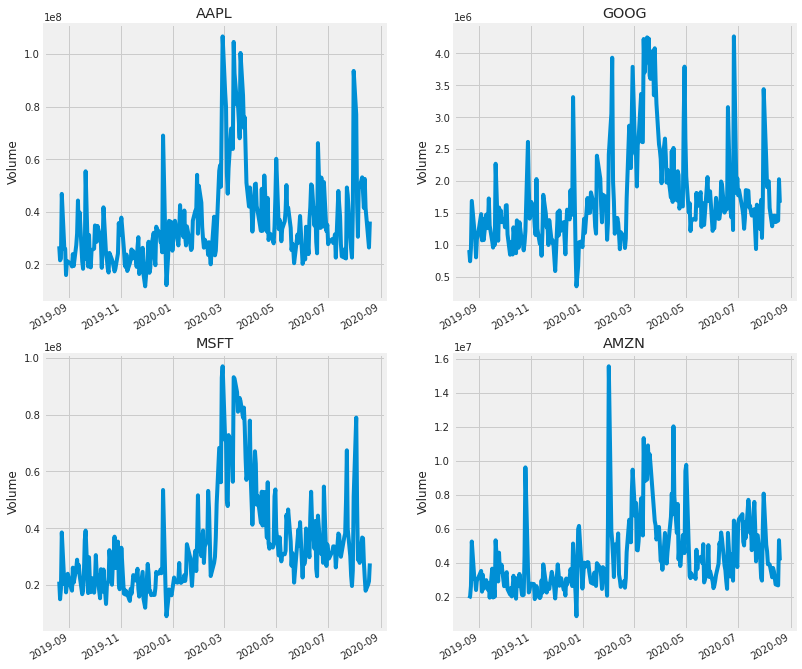

In [11]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

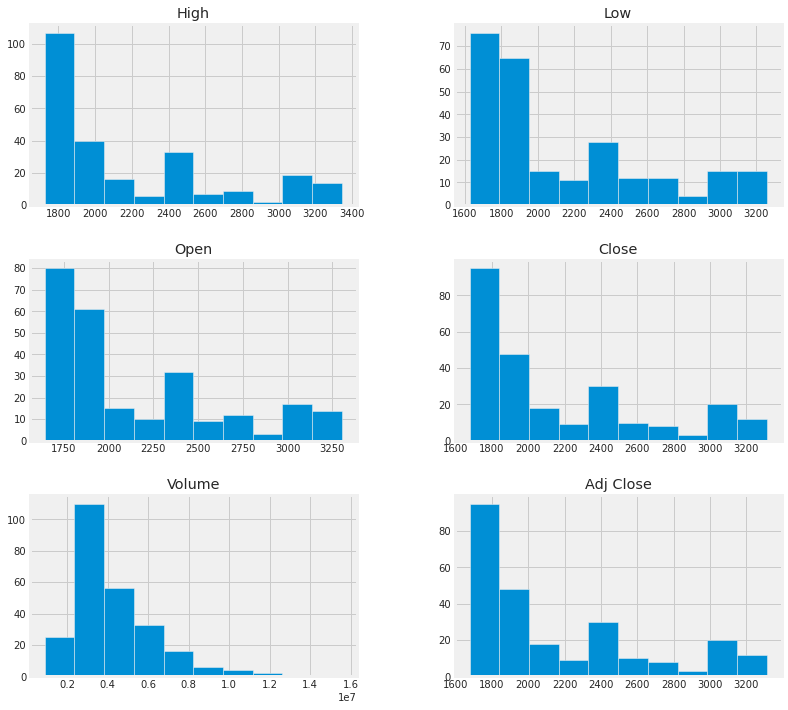

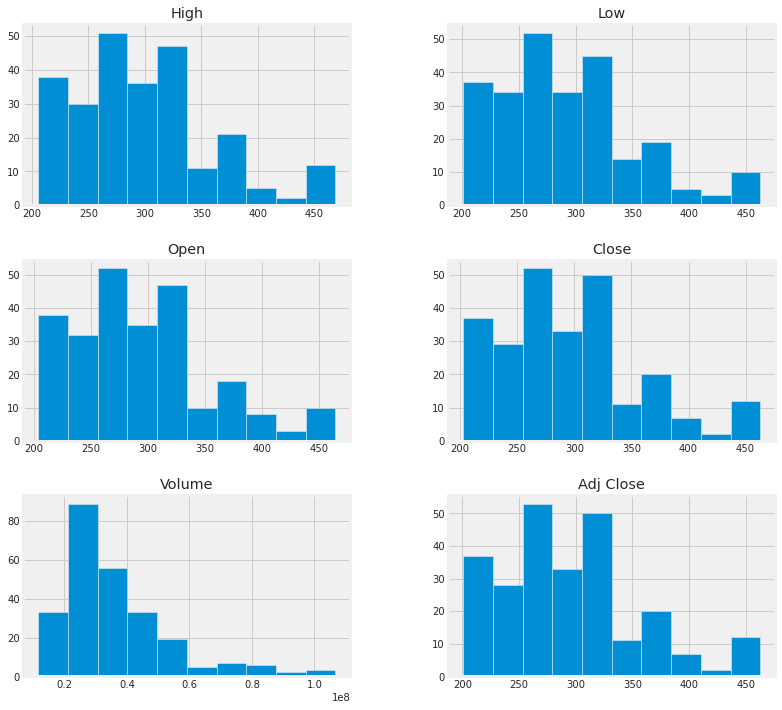

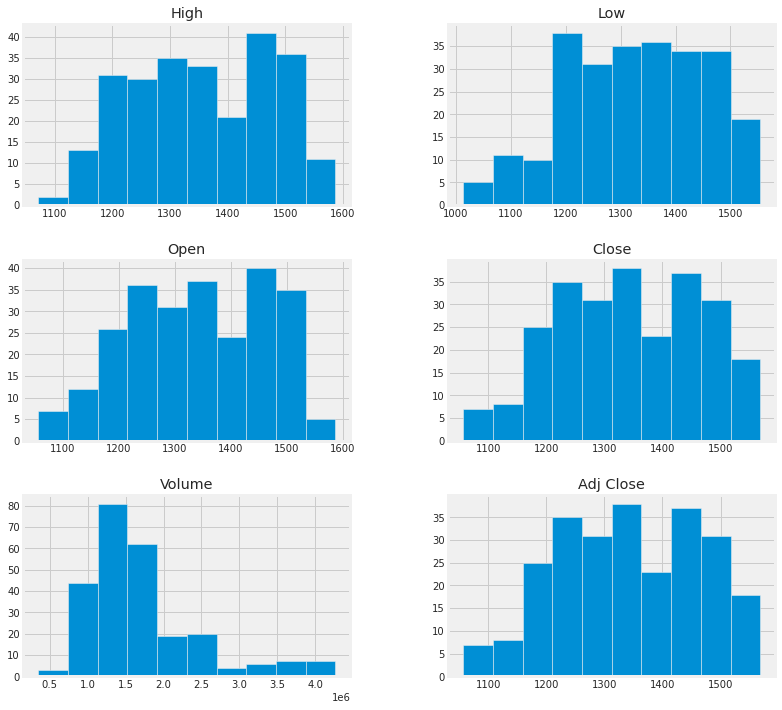

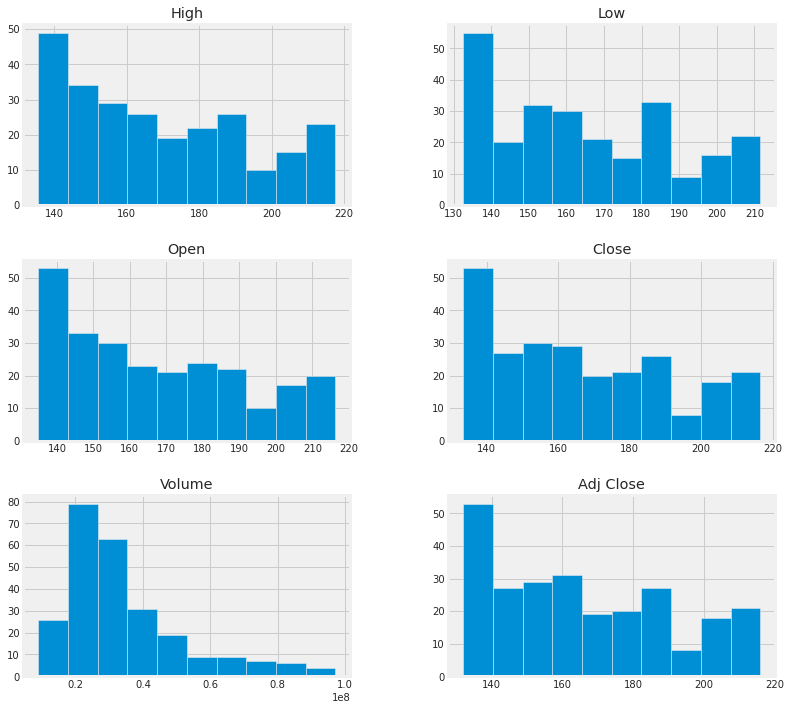

In [13]:
df.groupby("company_name").hist(figsize=(12, 12));

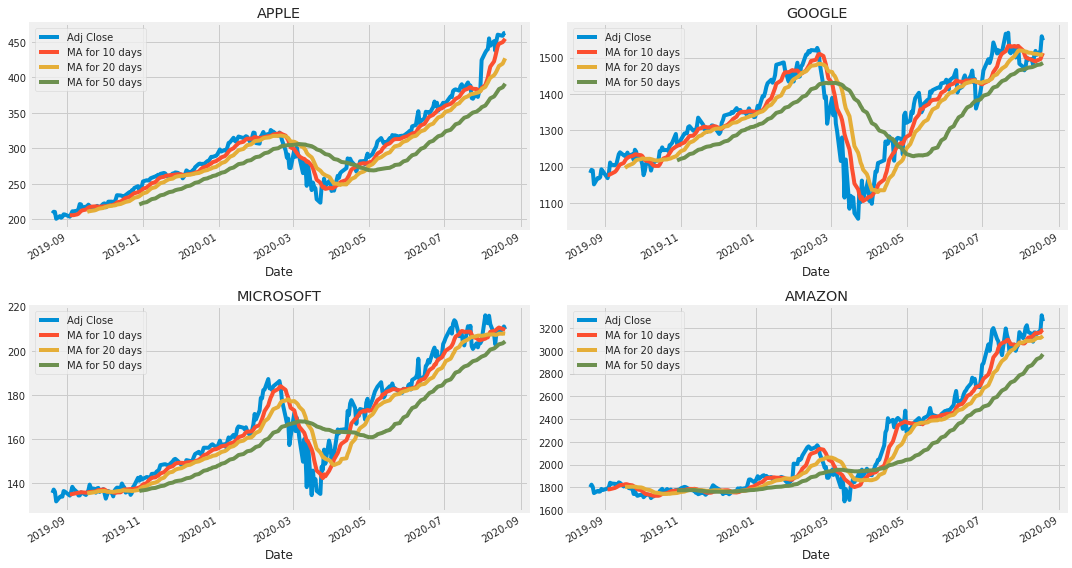

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

-  What was the daily return of the stock on average?

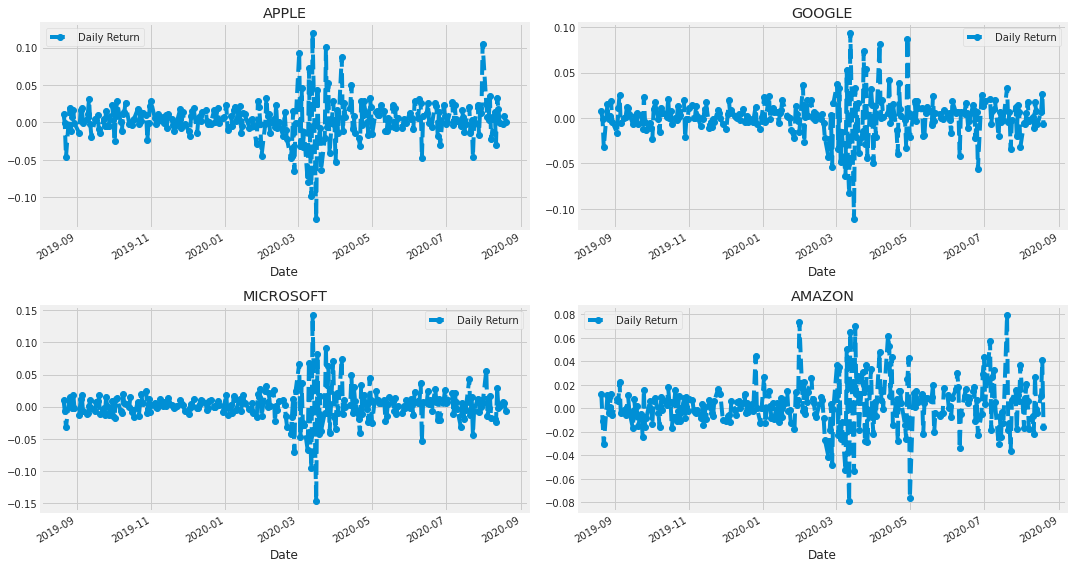

In [15]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

- What was the correlation between different stocks closing prices?

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-20,208.293350,1182.689941,135.714951,1801.380005
2019-08-21,210.550949,1191.250000,137.227707,1823.540039
2019-08-22,210.372726,1189.530029,136.229080,1804.660034
2019-08-23,200.649200,1151.290039,131.888504,1749.619995
2019-08-26,204.461349,1168.890015,133.925323,1768.869995


In [17]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-20,NaN,NaN,NaN,NaN
2019-08-21,0.010839,0.007238,0.011147,0.012302
2019-08-22,-0.000846,-0.001444,-0.007277,-0.010353
2019-08-23,-0.046220,-0.032147,-0.031862,-0.030499
2019-08-26,0.018999,0.015287,0.015443,0.011002


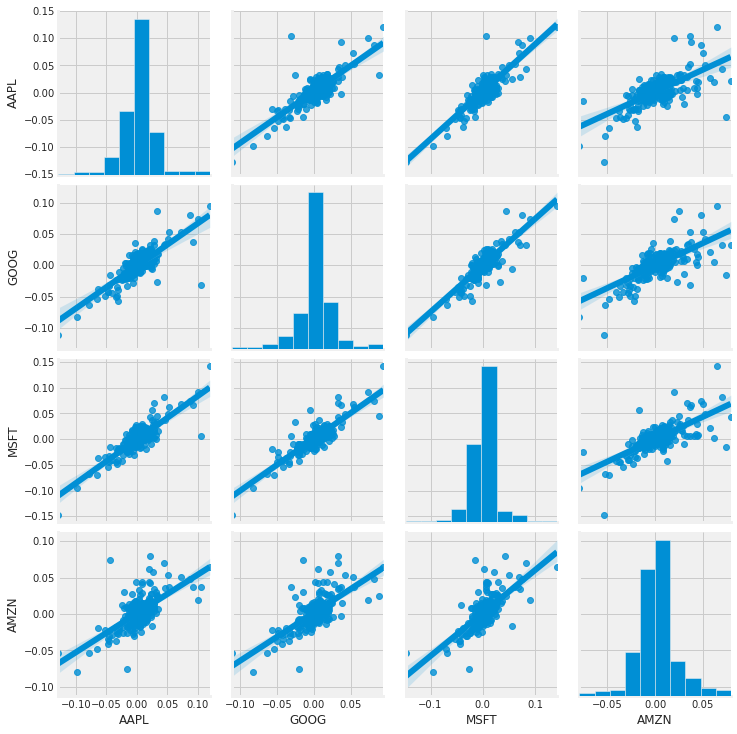

In [18]:

sns.pairplot(tech_rets, kind='reg')
plt.show()

-  How much value do we put at risk by investing in a particular stock?

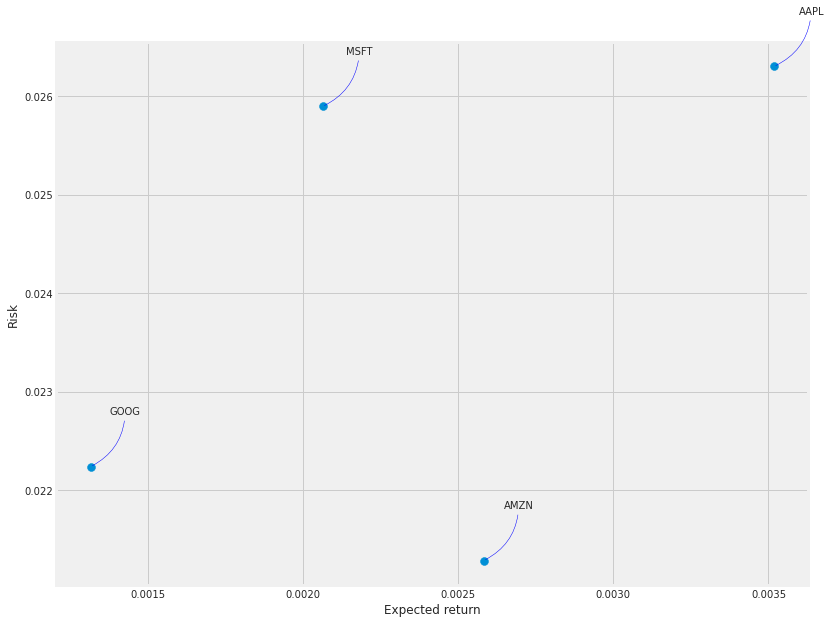

In [19]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

- Predicting the closing price stock price of APPLE inc

In [23]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2019-08-20', end=datetime.now())
#Show teh data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-20,213.350006,210.320007,210.880005,210.360001,26884300.0,208.293350
2019-08-21,213.649994,211.600006,212.990005,212.639999,21535400.0,210.550949
2019-08-22,214.440002,210.750000,213.190002,212.460007,22253700.0,210.372726
2019-08-23,212.050003,201.000000,209.429993,202.639999,46818000.0,200.649200
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.461349


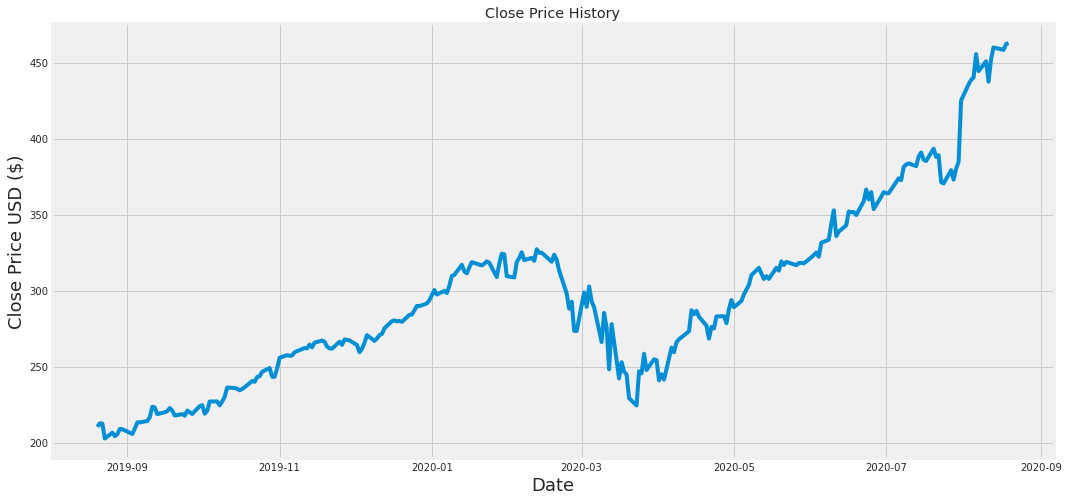

In [24]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:

#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

203

In [26]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02967063],
       [0.03843345],
       [0.03774168],
       [0.        ],
       [0.0147969 ],
       [0.0058419 ],
       [0.01110727],
       [0.02448209],
       [0.02344443],
       [0.01176063],
       [0.02517392],
       [0.04089319],
       [0.04081631],
       [0.04431377],
       [0.05403743],
       [0.08051808],
       [0.0785964 ],
       [0.0619163 ],
       [0.06633612],
       [0.06941081],
       [0.07736656],
       [0.07041012],
       [0.05799607],
       [0.061801  ],
       [0.05780389],
       [0.07067912],
       [0.06629771],
       [0.06218536],
       [0.08197857],
       [0.08436142],
       [0.06272343],
       [0.06987205],
       [0.09366231],
       [0.09385449],
       [0.08363118],
       [0.09373919],
       [0.10549982],
       [0.12902113],
       [0.12771435],
       [0.12560056],
       [0.12194933],
       [0.12544679],
       [0.12978979],
       [0.14554747],
       [0.14343368],
       [0.1558092 ],
       [0.15734657],
       [0.168

In [27]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02967063, 0.03843345, 0.03774168, 0.        , 0.0147969 ,
       0.0058419 , 0.01110727, 0.02448209, 0.02344443, 0.01176063,
       0.02517392, 0.04089319, 0.04081631, 0.04431377, 0.05403743,
       0.08051808, 0.0785964 , 0.0619163 , 0.06633612, 0.06941081,
       0.07736656, 0.07041012, 0.05799607, 0.061801  , 0.05780389,
       0.07067912, 0.06629771, 0.06218536, 0.08197857, 0.08436142,
       0.06272343, 0.06987205, 0.09366231, 0.09385449, 0.08363118,
       0.09373919, 0.10549982, 0.12902113, 0.12771435, 0.12560056,
       0.12194933, 0.12544679, 0.12978979, 0.14554747, 0.14343368,
       0.1558092 , 0.15734657, 0.16887661, 0.17836968, 0.15623197,
       0.15611667, 0.17725507, 0.20438914, 0.21084593, 0.20942391,
       0.20984663, 0.21826356, 0.22099242, 0.2289097 , 0.22798722])]
[0.2376340554091293]

[array([0.02967063, 0.03843345, 0.03774168, 0.        , 0.0147969 ,
       0.0058419 , 0.01110727, 0.02448209, 0.02344443, 0.01176063,
       0.02517392, 0.04089319, 0.040

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

143/143 [==============================] - 3s 24ms/step - loss: 0.0085


In [29]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

25.92378746471875

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


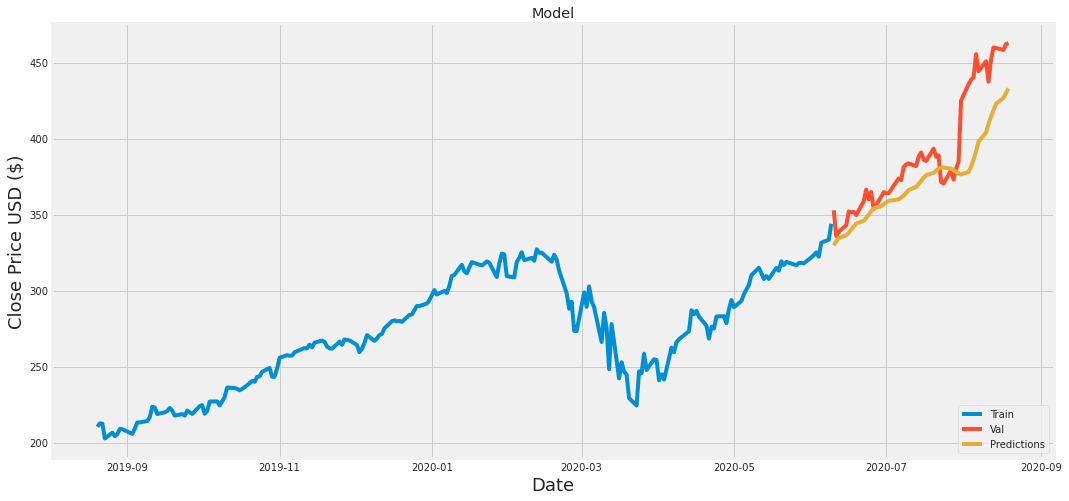

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()